# 1. Importing Packages

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import datetime as dt
import seaborn as sns
# import gmplot

from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
rcParams["figure.figsize"] = 12, 8

# 2. Reading the Data

In [3]:
crime = pd.read_csv("Crime_Data_2010_2017.csv")

# 3. Previewing the Data Variables

## 3.1. General Shape

In [4]:
print("The shape is {}".format(crime.shape))

The shape is (1584316, 26)


In [5]:
crime.tail(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
1584313,172116491,08/30/2017,07/15/2017,1,21,Topanga,2147,649,DOCUMENT FORGERY / STOLEN FELONY,0930 1822,...,NaN,IC,Invest Cont,649.0,NaN,NaN,NaN,20900 SHERMAN WY,NaN,"(34.201, -118.5885)"
1584314,172116498,09/08/2017,09/08/2017,1845,21,Topanga,2136,946,OTHER MISCELLANEOUS CRIME,1402,...,NaN,IC,Invest Cont,946.0,998.0,NaN,NaN,REMMET,WYANDOTTE,"(34.2029, -118.6003)"
1584315,172116510,09/08/2017,07/12/2017,2230,21,Topanga,2105,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,0400 1813 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,236.0,NaN,NaN,NaN,8600 INTERNATIONAL AV,NaN,"(34.2258, -118.5994)"


## 3.2. Date of Crime Reported and Crime Occurred

In [6]:
# Formatting to datetime object
try:
    date_reported = [dt.datetime.strptime(d, "%m/%d/%Y").date() for d in crime["Date Reported"]]
except:
    print("Already converted Date Reported")
    
try:
    date_occurred = [dt.datetime.strptime(d, "%m/%d/%Y").date() for d in crime["Date Occurred"]]
except:
    print("Already converted Date Occurred")
    
# Reassign the date reported and occurred columns
crime["Date Reported"] = np.array(date_reported)
crime["Date Occurred"] = np.array(date_occurred)

### 3.2.1. Crime by Specific Periods

In [7]:
# Making lists of days, months, and years for reported from datetime objects
day_reported = [d.isoweekday() for d in crime["Date Reported"]]
mon_reported = [d.month for d in crime["Date Reported"]]
year_reported = [d.year for d in crime["Date Reported"]]
# Making new columns for each
crime["Day Reported"] = np.array(day_reported)
crime["Month Reported"] = np.array(mon_reported)
crime["Year Reported"] = np.array(year_reported)

In [8]:
# Making lists of days, months, and years for occurred from datetime objects
day_occurred = [d.isoweekday() for d in crime["Date Occurred"]]
mon_occurred = [d.month for d in crime["Date Occurred"]]
year_occurred = [d.year for d in crime["Date Occurred"]]
# Making new columns for each
crime["Day Occurred"] = np.array(day_occurred)
crime["Month Occurred"] = np.array(mon_occurred)
crime["Year Occurred"] = np.array(year_occurred)

#### 3.2.1.1. Crime by Day of the Week

##### 3.2.1.1.1. Crime Reported by Day

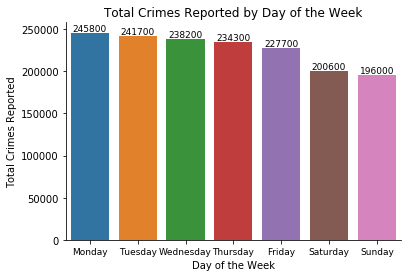

In [9]:
fig, ax = plt.subplots()
# Plotting crimes reported by day
sns.barplot(x=crime["Day Reported"].value_counts().index, y=crime["Day Reported"].value_counts())
# Axes
ax.set_title("Total Crimes Reported by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Reported")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.1.2. Crime Occurred by Day

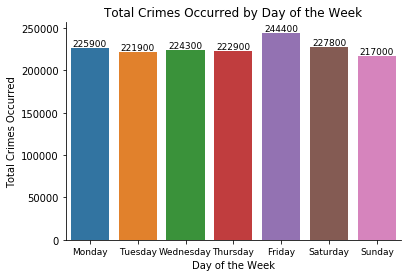

In [10]:
fig, ax = plt.subplots()
# Plotting crimes occurred by day
sns.barplot(x = crime["Day Occurred"].value_counts().index, y = crime["Day Occurred"].value_counts())
# Axes
ax.set_title("Total Crimes Occurred by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Occurred")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.1.3. Comparing Crime Reported and Occured by Day Side to Side

In [11]:
# Making a new dataframe
df1 = pd.DataFrame({
    "Day" : list(crime["Day Reported"].value_counts().index),
    "Crime Occurred" : list(crime["Day Occurred"].value_counts()),
    "Crime Reported" : list(crime["Day Reported"].value_counts())
})
dayrepocc = df1.set_index("Day").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

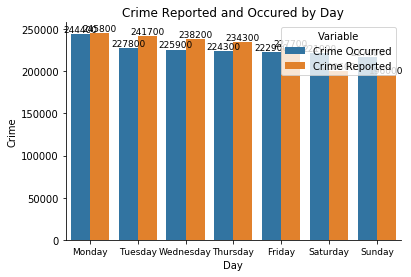

In [12]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Day", y = "Crime", hue = "Variable", data=dayrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Day")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine(fig)

There are more crimes occurring on the weekends, yet fewer crimes reported on Saturday and Sunday. Probably because petty crimes are not reported till the weekdays.

#### 3.2.1.2. Crime by Month

##### 3.2.1.2.1. Crime Reported by Month

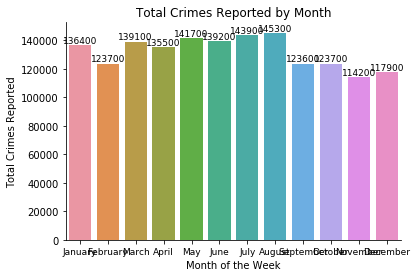

In [13]:
fig, ax = plt.subplots()
# Plotting crimes reported by month
sns.barplot(x = crime["Month Reported"].value_counts().index, y = crime["Month Reported"].value_counts())
# Axes
ax.set_title("Total Crimes Reported by Month")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_xlabel("Month of the Week")
ax.set_ylabel("Total Crimes Reported")
# Adding Values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.2.2. Crime Occurred by Month

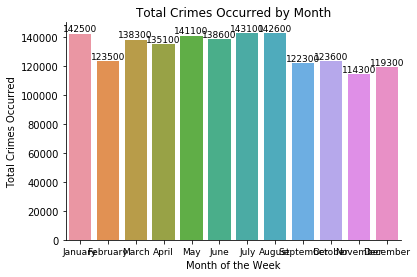

In [14]:
fig, ax = plt.subplots()
# Plotting crimes occurred by month
sns.barplot(x=crime["Month Occurred"].value_counts().index, y=crime["Month Occurred"].value_counts())
# Axes
ax.set_title("Total Crimes Occurred by Month")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_xlabel("Month of the Week")
ax.set_ylabel("Total Crimes Occurred")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.2.3. Comparing Crime Reported and Occurred by Month Side by Side

In [15]:
# Making a new dataframe
df2 = pd.DataFrame({
    "Month" : list(crime["Month Reported"].value_counts().index),
    "Crime Reported" : list(crime["Month Reported"].value_counts()),
    "Crime Occurred" : list(crime["Month Occurred"].value_counts())
})
monrepocc = df2.set_index("Month").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

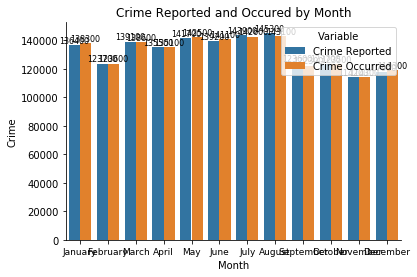

In [16]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Month", y = "Crime", hue = "Variable", data=monrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Month")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=8, color='black', ha='center', va='bottom')
sns.despine(fig)

As expected, months with fewer days in them generally have less crimes than the ones with 31 days.

There are fewer crimes stats in the last 4 months because the dataset is up to date until September 2017, hence lack of occurrences and reports.

#### 3.2.1.3. Crime by Year

##### 3.2.1.3.1. Crime Reported by Year

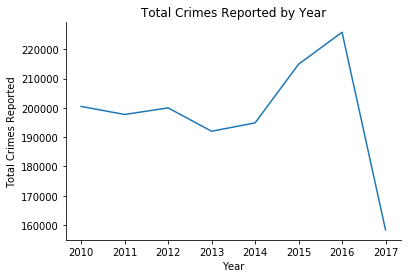

In [17]:
fig, ax = plt.subplots()
# Plotting crimes reported by year
plt.plot(crime["Year Reported"].value_counts().sort_index().index, crime["Year Reported"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Reported by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total Crimes Reported")
sns.despine()

##### 3.2.1.3.2. Crime Occurred by Year

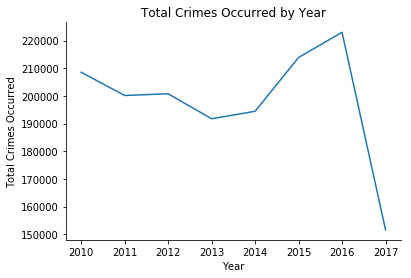

In [18]:
fig, ax = plt.subplots()
# Plotting crimes occured by year
plt.plot(crime["Year Occurred"].value_counts().sort_index().index, crime["Year Occurred"].value_counts().sort_index())
# AXes
ax.set_title("Total Crimes Occurred by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total Crimes Occurred")
sns.despine()

##### 3.2.1.3.3. Comparing Crime Reported and Occured by Year Side to Side

In [19]:
# Making a new dataframe
df3 = pd.DataFrame({
    "Year" : list(crime["Year Reported"].value_counts().index),
    "Crime Reported" : list(crime["Year Reported"].value_counts()),
    "Crime Occurred" : list(crime["Year Occurred"].value_counts())
})
yearrepocc = df3.set_index("Year").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

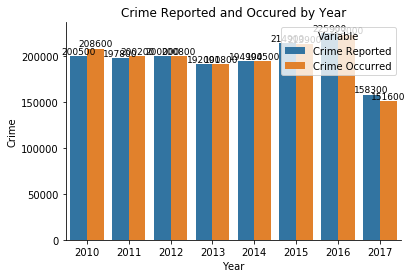

In [20]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Year", y = "Crime", hue = "Variable", data=yearrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Year")
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine(fig)

Based on the 3 previous graphs, it seems that crimes occurring and reported have been increasing the last 3 years.

This data is only up to date as of September of 2017 which explains why there are significantly less crimes in 2017.

### 3.2.2. Crime Chronologically

#### 3.2.2.1. Crimes Over Time

##### 3.2.2.1.1. Crimes Reported Over Time

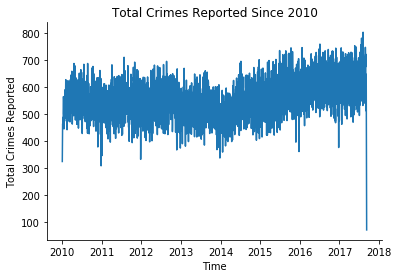

In [21]:
fig, ax = plt.subplots()
# Plot crimes reported over time
plt.plot(crime["Date Reported"].value_counts().sort_index().index, crime["Date Reported"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Reported Since 2010")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Reported")
sns.despine()

We can barely see the upward trend of increasing crimes reported over the last few years.

##### Crimes Occurred Over Time

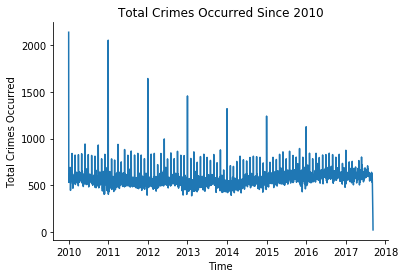

In [22]:
fig, ax = plt.subplots()
# Plot crimes occurred over time
plt.plot(crime["Date Occurred"].value_counts().sort_index().index, crime["Date Occurred"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Occurred Since 2010")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurred")
sns.despine()

There are these spikes within crime occurrance dates which I atttribute to unknown date of the crime. It seems that if 
someone only realizes that they are a victim of identity theft, the paperwork for 'crime occurrence' are assumed to be a 
specific date.

In short, all crimes with unknown occurring date are all attributed to a specific date.

#### 3.2.2.2. Crimes Over Time by Month and Year

##### 3.2.2.2.1. Crimes Reported over Time by Month and Year

In [23]:
# Strip the month and the year as string
month_year_rep = [str(m)+"/"+str(y) for m,y in zip(crime["Month Reported"], crime["Year Reported"])]
# Make them date time objects as a list
month_year_rep_formatted = [dt.datetime.strptime(d, "%m/%Y") for d in month_year_rep]
# Turn the list of datetime month and year into a new column
crime["Month Year Rep"] = np.array(month_year_rep_formatted)

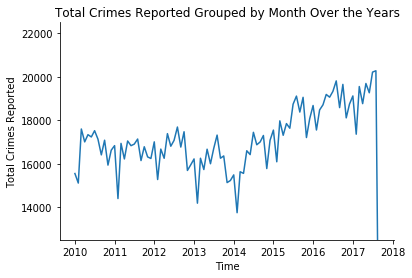

In [24]:
fig, ax = plt.subplots()
# Plot crimes reported over months and years
plt.plot(crime["Month Year Rep"].value_counts().sort_index().index, crime["Month Year Rep"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Reported Grouped by Month Over the Years")
ax.set_ylim(12500, 22500)
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Reported")
sns.despine()

Again, here we see the upward trend for the last 2 to 3 years.

##### 3.2.2.2.2. Crimes Occurred over Time by Month and Year

In [25]:
# Strip the month and the year as string
month_year_occ = [str(m)+"/"+str(y) for m,y in zip(crime["Month Occurred"], crime["Year Occurred"])]
# Make them date time objects as a list
month_year_occ_formatted = [dt.datetime.strptime(d, "%m/%Y") for d in month_year_occ]
# Turn the list of datetime month and year into a new column
crime["Month Year Occ"] = np.array(month_year_occ_formatted)

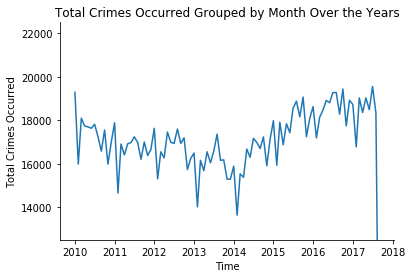

In [26]:
fig, ax = plt.subplots()
# Plot crimes occurred over months and years
plt.plot(crime["Month Year Occ"].value_counts().sort_index().index, crime["Month Year Occ"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Occurred Grouped by Month Over the Years")
ax.set_ylim(12500, 22500)
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurred")
sns.despine()

Some of the sharp increase which is followed a sharp decrease is attributed to January, then February.

## 3.3. Time Occurred

Since time is given in military format, it has to be formatted to be appropriately sorted through and indexed.

In [27]:
def makemil(time):
    ntime = ""
    if len(str(time)) == 1:
        ntime = "000" + str(time)
    if len(str(time)) == 2:
        ntime = "00" + str(time)
    if len(str(time)) == 3:
        ntime = "0" + str(time)
    if len(str(time)) == 4:
        ntime = str(time)
    return ntime

def returnhour(miltime):
    return miltime[:2]

In [28]:
# Formatting to 4 char string
crime["Time Occurred"] = crime["Time Occurred"].apply(makemil)

### 3.3.1. Crime Throughout the Day

In [29]:
# Formatting to int so it can be sorted
crime["Time Occurred Int"] = crime["Time Occurred"].apply(int)

/Users/jjxu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


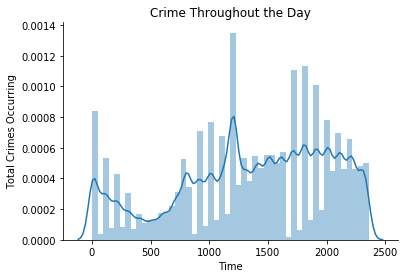

In [30]:
fig, ax = plt.subplots()
# Plot crime throughout a single day hours
sns.distplot(crime["Time Occurred Int"])
# Axes
ax.set_title("Crime Throughout the Day")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

### 3.3.2. Crime Throughout the Day by the Hour

In [31]:
# Extracting the hour out from time
crime["Hour Occurred"] = crime["Time Occurred"].apply(returnhour)

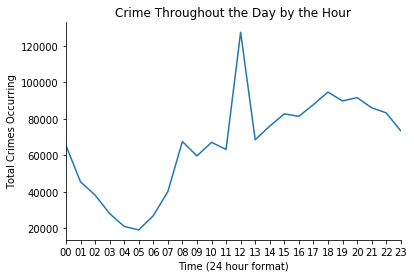

In [32]:
fig, ax = plt.subplots()
# Crime through the hours
plt.plot(crime["Hour Occurred"].value_counts().sort_index().index, crime["Hour Occurred"].value_counts().sort_index())
# Axes
ax.set_title("Crime Throughout the Day by the Hour")
plt.xticks(range(24))
plt.xlim(0,23)
plt.xlabel("Time (24 hour format)")
plt.ylabel("Total Crimes Occurring")
sns.despine()

From the above two graphs, it is evidently clear that there is a surge of crimes occurring at 12pm.

We shall delve into this later.

## 3.4. Area Name

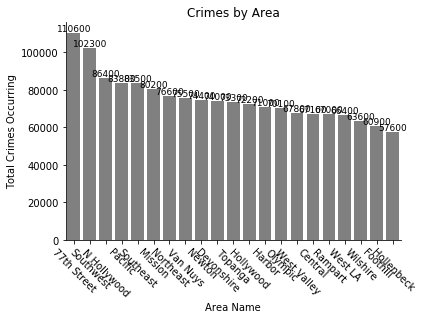

In [33]:
fig, ax = plt.subplots()
# Plotting crimes by neighborhood area
sns.barplot(crime["Area Name"].value_counts().index, crime["Area Name"].value_counts(), color="gray", ax=ax)
# Axes
ax.set_title("Crimes by Area")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("Area Name")
ax.set_ylabel("Total Crimes Occurring")
# Adding Values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

There are twice as much crimes in the 77th Street Area than Hollenbeck, which is interesting because of the population 
and square miles ratio.

* 77th Street: Approximately 175,000 population and 11.9 square miles.
* Hollenbeck: Apprioximately 200,000 population and 15.2 square miles.

## 3.5. Crime Code

In [34]:
# Tally total of top 20 crimes
crime["Crime Code Description"].value_counts().head(20)

BATTERY - SIMPLE ASSAULT                                        145767
VEHICLE - STOLEN                                                121329
BURGLARY FROM VEHICLE                                           121318
BURGLARY                                                        114751
THEFT PLAIN - PETTY ($950 & UNDER)                              113709
THEFT OF IDENTITY                                               100653
INTIMATE PARTNER - SIMPLE ASSAULT                                85908
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114     79433
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         71523
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                   67631
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                  63995
ROBBERY                                                          63408
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036     56377
CRIMINAL THREATS - NO WEAPON DISPLAYED                           44560
SHOPLI

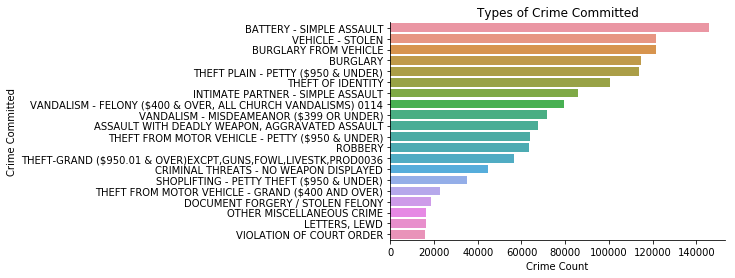

In [35]:
# Since the number of unique crimes are more than 100, plot top 20
fig, ax = plt.subplots()
# Plotting crimes by type
sns.barplot(y=crime["Crime Code Description"].value_counts().index[0:20], 
                 x=crime["Crime Code Description"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Types of Crime Committed")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Committed")
sns.despine()

Battery leads the crime chart with a difference of at least 10% from the next crimes, Burglary from Vehicle & Stolen Vehicle.

## 3.6. MO Codes

MO, or Modus Operandi, is defined by Wikipedia as someone's habits of working. Particularly, the actions involved in a crime.

In [36]:
# Splitting the MO codes per whitespace
MO_list = []
for item in crime["MO Codes"].dropna():
    MO_list.append(str(item).split())

In [37]:
# Making a new DataFrame for MO Codes
tempo_MO_split = []
for i in MO_list:
    for j in i:
        tempo_MO_split.append("MO "+j)
        
tempo_MO_split = np.array(tempo_MO_split)

pre_MO_df = [["","MO Codes"]]
for i in range(len(tempo_MO_split)):
    pre_MO_df.append([i, tempo_MO_split[i]])
    
pre_MO_data = np.array(pre_MO_df)

post_MO_df = pd.DataFrame(data=pre_MO_data[1:,1:],
                  index=pre_MO_data[1:,0],
                  columns=pre_MO_data[0,1:])

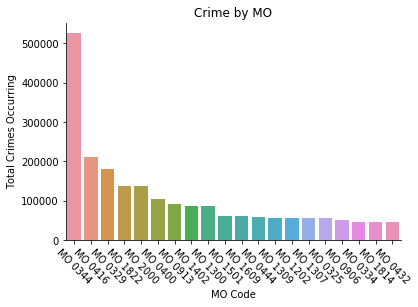

In [38]:
fig, ax = plt.subplots()
# Looking into crime by MO
sns.barplot(post_MO_df["MO Codes"].value_counts().index[:20], post_MO_df["MO Codes"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Crime by MO")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("MO Code")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

[MO Codes Description](https://drive.google.com/file/d/0B_pE2uXYbVrDTFRONThLR2MtZlE/view?usp=sharing)

* MO 0344: Removes vict property
* MO 0416: Hit-hit w/ weapon
* MO 0329: Vandalized
* MO 1822: Stranger
* MO 2000: Domestic violence


## 3.7. Victim Age

In [39]:
# Basic stats about Victim Age
crime["Victim Age"].describe()[1:]

mean    35.934195
std     16.811559
min     10.000000
25%     23.000000
50%     34.000000
75%     48.000000
max     99.000000
Name: Victim Age, dtype: float64

/Users/jjxu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


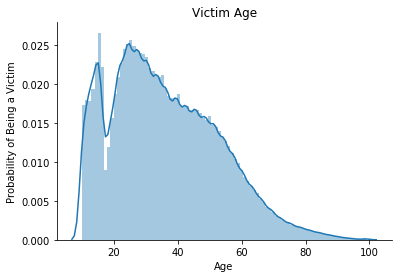

In [40]:
fig, ax = plt.subplots()
# Plotting victim's age distribution
sns.distplot(crime["Victim Age"].dropna(), bins=90, ax=ax)
# Axes
ax.set_title("Victim Age")
ax.set_xlabel("Age")
ax.set_ylabel("Probability of Being a Victim")
sns.despine()

Mean of the victims are 35, and is supported by a median of 34.

## 3.8. Victim Sex

In [41]:
# Victim Sex Demographics
crime["Victim Sex"].value_counts()                                

M    739581
F    675402
X     24080
H        53
-         1
Name: Victim Sex, dtype: int64

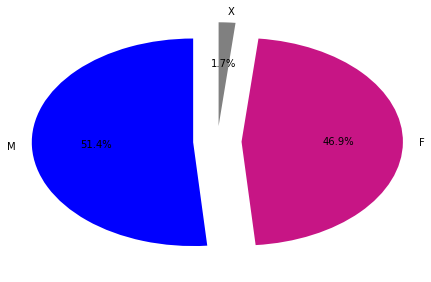

In [42]:
fig, ax = plt.subplots(figsize=(6,4))
# Plotting piechart of victim sex
ax.pie(crime["Victim Sex"].value_counts()[:3],labels=crime["Victim Sex"].value_counts()[:3].index, startangle=90, 
       explode=(0.15,0.15,.15), autopct="%0.1f%%", colors=("blue","mediumvioletred","gray"))
fig.tight_layout()

## 3.9. Victim Descent

In [43]:
# Changing the abbreviations to the whole description
Victims_bg = {
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}
crime["Victim Descent"] = crime["Victim Descent"].map(Victims_bg)

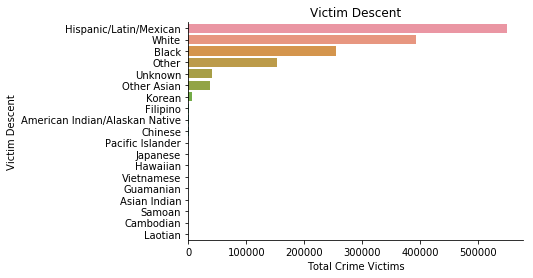

In [44]:
fig, ax = plt.subplots()
# Plotting by victim gescent generally
sns.barplot(y=crime["Victim Descent"].value_counts().index, x=crime["Victim Descent"].value_counts(), ax=ax)
# Axes
ax.set_title("Victim Descent")
ax.set_xlabel("Total Crime Victims")
ax.set_ylabel("Victim Descent")
sns.despine()

There are 7000 Korean crime victims and only 2000 Filipino crime victims in the last 5 years.

## 3.10. Premise Description

In [45]:
# Previewing the total tally
crime["Premise Description"].value_counts()

STREET                                          352160
SINGLE FAMILY DWELLING                          328198
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    204980
PARKING LOT                                     112576
SIDEWALK                                         79247
OTHER BUSINESS                                   71097
VEHICLE, PASSENGER/TRUCK                         60450
DRIVEWAY                                         32473
GARAGE/CARPORT                                   28407
DEPARTMENT STORE                                 22476
RESTAURANT/FAST FOOD                             20990
MARKET                                           16492
OTHER STORE                                      12653
YARD (RESIDENTIAL/BUSINESS)                      11113
PARKING UNDERGROUND/BUILDING                     10927
PARK/PLAYGROUND                                  10856
OTHER PREMISE                                    10674
HIGH SCHOOL                                      10389
ALLEY     

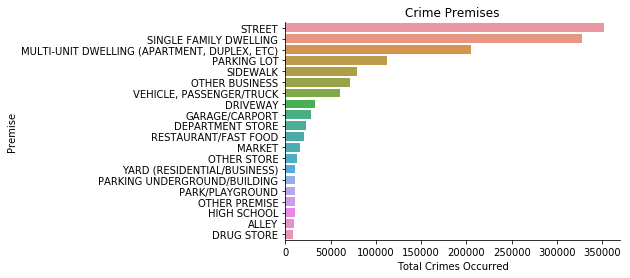

In [46]:
# We will only be looking at the top 20 premises
fig, ax = plt.subplots()
# Plotting top 20 premises
sns.barplot(y=crime["Premise Description"].value_counts().head(20).index,
                 x=crime["Premise Description"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Crime Premises")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Premise")
sns.despine()

We shall look further into the types of crime that happen at the top premises.

## 3.11. Weapon Description

In [47]:
# Number of Na values
missvals = crime["Weapon Description"].isnull().sum()
print("There are {} missing values".format(missvals))

There are 1059560 missing values


We assume that missing values are either truly missing, or no weapon was used.

In [48]:
crime["Weapon Description"].value_counts().head(10)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    319818
VERBAL THREAT                                      43814
UNKNOWN WEAPON/OTHER WEAPON                        40746
HAND GUN                                           25352
SEMI-AUTOMATIC PISTOL                              10096
KNIFE WITH BLADE 6INCHES OR LESS                    9335
OTHER KNIFE                                         6946
UNKNOWN FIREARM                                     6037
VEHICLE                                             5348
REVOLVER                                            4567
Name: Weapon Description, dtype: int64

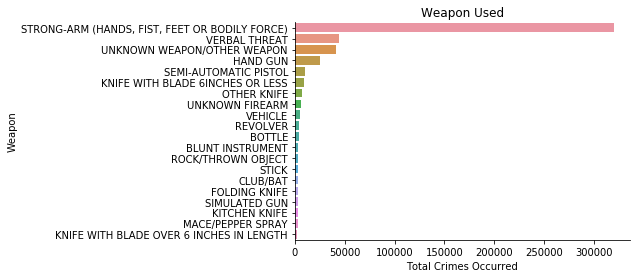

In [49]:
fig, ax = plt.subplots()
# Plotting weapons used
sns.barplot(y=crime["Weapon Description"].value_counts().head(20).index,
                 x=crime["Weapon Description"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Weapon Used")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Weapon")
sns.despine()

## 3.12. Status Description

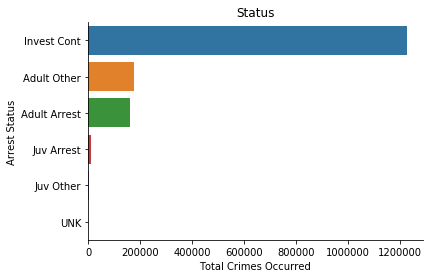

In [50]:
fig, ax = plt.subplots()
# Plotting the arrest status
sns.barplot(y=crime["Status Description"].value_counts().index,
                 x=crime["Status Description"].value_counts(), ax=ax)
# Axes
ax.set_title("Status")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Arrest Status")
sns.despine()

It is surprising that there are 6 times more ongoing investigations than adult arrests.

## 3.13. Crime Code

In [51]:
# Making a new dataframe
CC_list = []
for i in range(1,5):
    for item in crime["Crime Code "+str(i)].dropna():
        CC_list.append("Code " +str(int(item)))
        
tempo_CC = np.array(CC_list)

CC_df = pd.DataFrame(tempo_CC)
CC_df = CC_df.rename(columns = {0 : "Crime Codes"})

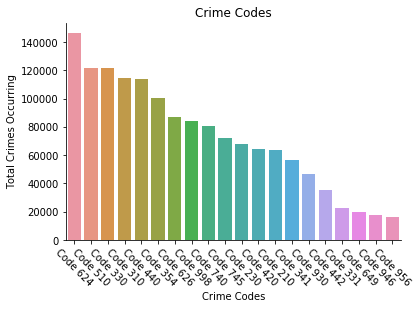

In [52]:
fig, ax = plt.subplots()
# Plotting crime codes
ax = sns.barplot(CC_df["Crime Codes"].value_counts().head(20).index, CC_df["Crime Codes"].value_counts().head(20))
# Axes
ax.set_title("Crime Codes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("Crime Codes")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

Crime Codes are not provided.

## 3.14. Coordinates

In [53]:
# Dropping missing values and an out of place coordinate of (0, 0) and creating coordinates
crime_lats = []
crime_lons = []
for locs in crime["Location "].dropna():
    if locs.split(",")[0] != "(0" and locs.split(",")[1] != " 0)":
        crime_lats.append(locs.split(",")[0][1:])
        crime_lons.append(locs.split(",")[1][1:-2])
crime_lats = list(map(float, crime_lats))        
crime_lons = list(map(float, crime_lons))        

In [64]:
import gmplot
#Sets center of the map
gmap = gmplot.GoogleMapPlotter(34.0522, -118.2437, 11)
#Plots the heatmap
gmap.heatmap(crime_lats, crime_lons)

In [59]:
# Saves it
gmap.draw("crime heatmap.html")

[Heatmap Image](https://imgur.com/Lau8xl2)

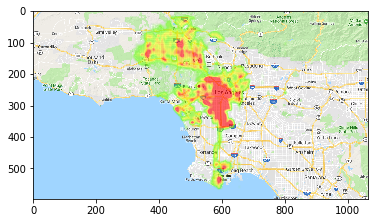

In [65]:
img=mpimg.imread('crime heatmap.png')
imgplot = plt.imshow(img)
plt.show()

# 4. Data Exploration

## 4.1. Are certain genders more prone to become victims for certain crimes?

In [67]:
# Removing Entries for X and H and - (by elimination)
crime["Victim Gender"] = crime["Victim Sex"][crime["Victim Sex"] != "X"]
crime["Victim Gender"] = crime["Victim Gender"][crime["Victim Gender"] != "H"]
crime["Victim Gender"] = crime["Victim Gender"][crime["Victim Gender"] != "-"]

In [68]:
# Combining two columns into a dataframe
cc_vg = crime[["Crime Code Description", "Victim Gender"]]
# Dropping null values
cc_vg = cc_vg[pd.notnull(cc_vg["Victim Gender"])]

In [69]:
# Saving top 10 crimes
crimetop10 = cc_vg["Crime Code Description"].value_counts().head(10).index
# Choosing data that is included in the top 10 crimes (by selection)
crimecc = cc_vg.loc[cc_vg["Crime Code Description"].isin(crimetop10)]

In [70]:
# Group by Crime Code Description and Victim Gender
cc_gender = crimecc.groupby(["Crime Code Description", "Victim Gender"]).size().reset_index(name="Count")
cc_gender

,Crime Code Description,Victim Gender,Count
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,18422
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",M,49034
2,BATTERY - SIMPLE ASSAULT,F,77588
3,BATTERY - SIMPLE ASSAULT,M,68070
4,BURGLARY,F,46685
5,BURGLARY,M,65197
6,BURGLARY FROM VEHICLE,F,54761
7,BURGLARY FROM VEHICLE,M,66187
8,INTIMATE PARTNER - SIMPLE ASSAULT,F,69360
9,INTIMATE PARTNER - SIMPLE ASSAULT,M,16524


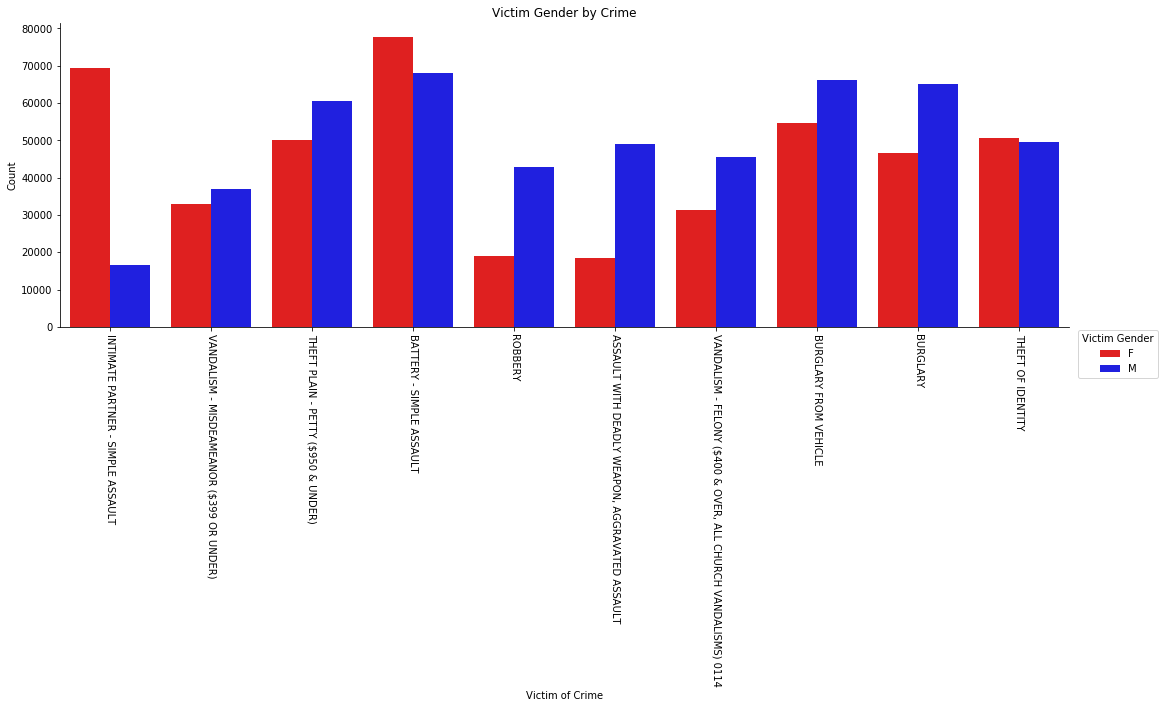

In [71]:
# Factorplot Crime and Gender based on count
ax = sns.factorplot(x="Crime Code Description", hue="Victim Gender", kind="count", data=crimecc, size=5, aspect=3, 
                    palette=["red", "blue"])
# Axes
plt.title("Victim Gender by Crime")
ax.set_xticklabels(rotation=-90)
ax.set_xlabels("Victim of Crime")
ax.set_ylabels("Count")
sns.despine()

Some things to note are:
* The close to equal distribution for vandalism (misdemeanor) and identity theft.
* The two crimes that women victims are more often are Intimate partner sexual assault & Battery simple assault.
* I would expect that burglary from vehicle or stolen vehicle would have equal distribution. It is just probably just that there are more cars owned by males than females.

## 4.2. Gun Crimes and Hour Occurred

In [72]:
# Filtering only rows with Hand guns or Semi-automatic pistols (by equal to)
crime["Guns Only"] = crime["Weapon Description"][(crime["Weapon Description"] == "HAND GUN") | 
                                                 (crime["Weapon Description"] == "SEMI-AUTOMATIC PISTOL")]

In [73]:
# Group by Guns Only and Hour Occurred
cc_gender = crime.groupby(["Hour Occurred", "Guns Only"]).size().reset_index(name="Count")
cc_gender.tail(6)

,Hour Occurred,Guns Only,Count
42,21,HAND GUN,2066
43,21,SEMI-AUTOMATIC PISTOL,753
44,22,HAND GUN,1932
45,22,SEMI-AUTOMATIC PISTOL,690
46,23,HAND GUN,1837
47,23,SEMI-AUTOMATIC PISTOL,711


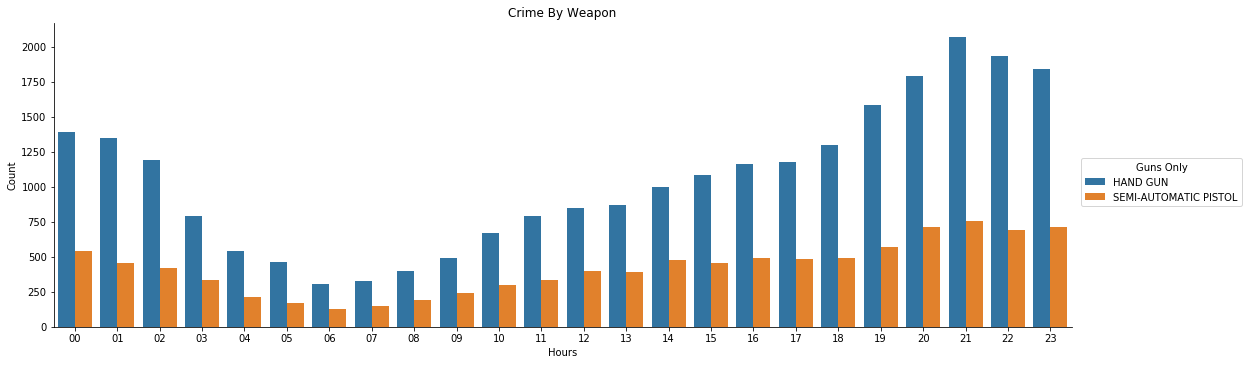

In [74]:
# Factorplot Crimes by Weapon used
ax = sns.factorplot(x="Hour Occurred", hue="Guns Only", kind="count", data=crime, size=5, aspect=3)
# Axes
plt.title("Crime By Weapon")
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

As we can see, firearm activites occur at night, between 7pm to just before midnight.

## 4.3. Premise and Hour Occurred

In [75]:
crime["Premise Description"].value_counts().head(5)

STREET                                          352160
SINGLE FAMILY DWELLING                          328198
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    204980
PARKING LOT                                     112576
SIDEWALK                                         79247
Name: Premise Description, dtype: int64

In [76]:
# Filtering crimes that happen by top 5 by (by equal to)
crime["Public Premise"] = crime["Premise Description"][(crime["Premise Description"] == "STREET") |
                                                       (crime["Premise Description"] == "SINGLE FAMILY DWELLING") | 
                                                       (crime["Premise Description"] == "MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)") |
                                                       (crime["Premise Description"] == "PARKING LOT") |
                                                       (crime["Premise Description"] == "SIDEWALK")]

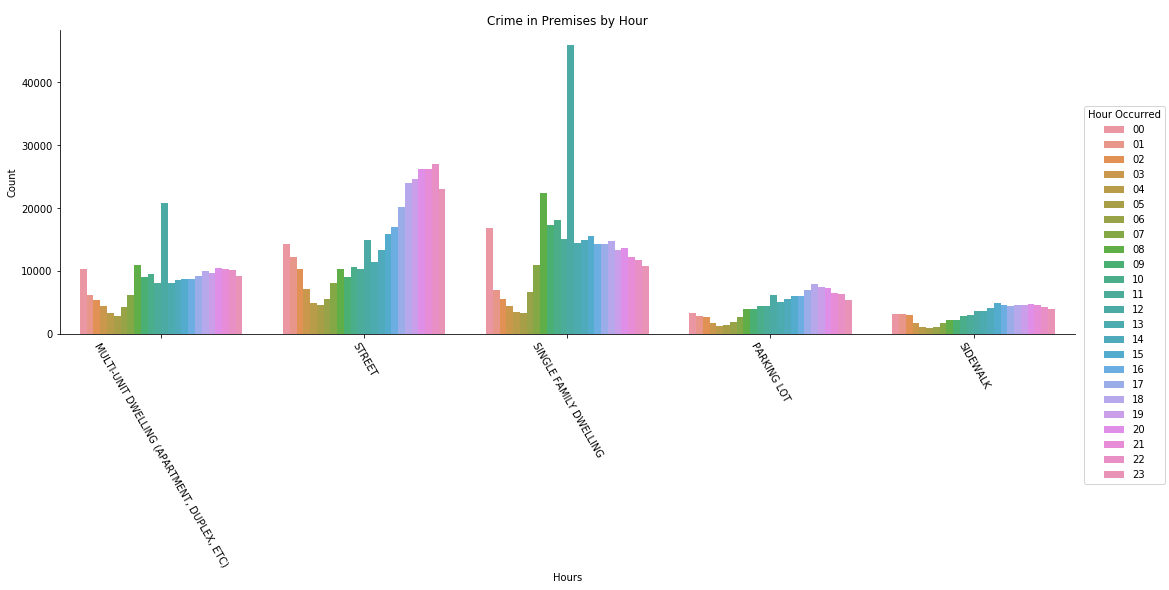

In [77]:
# Factorplot Crime and Gender based on count
ax = sns.factorplot(x="Public Premise", hue="Hour Occurred", kind="count", data=crime, size=5, aspect=3)
# Axes
plt.title("Crime in Premises by Hour")
ax.set_xticklabels(rotation=-60)
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

* Streets are generally more unsafe at night, so are sidewalks.
* In dwellings, we see the 12pm surge of crimes again, which will be covered later.

## 4.4 Premise and Type of Crime

In [78]:
# Saving top 10 types of crime
crimetoptype = crime["Crime Code Description"].value_counts().head(16).index
# Choosing data that is included in the top 10 types of crimes (by selection)
crimepremtype = crime.loc[crime["Crime Code Description"].isin(crimetoptype)]

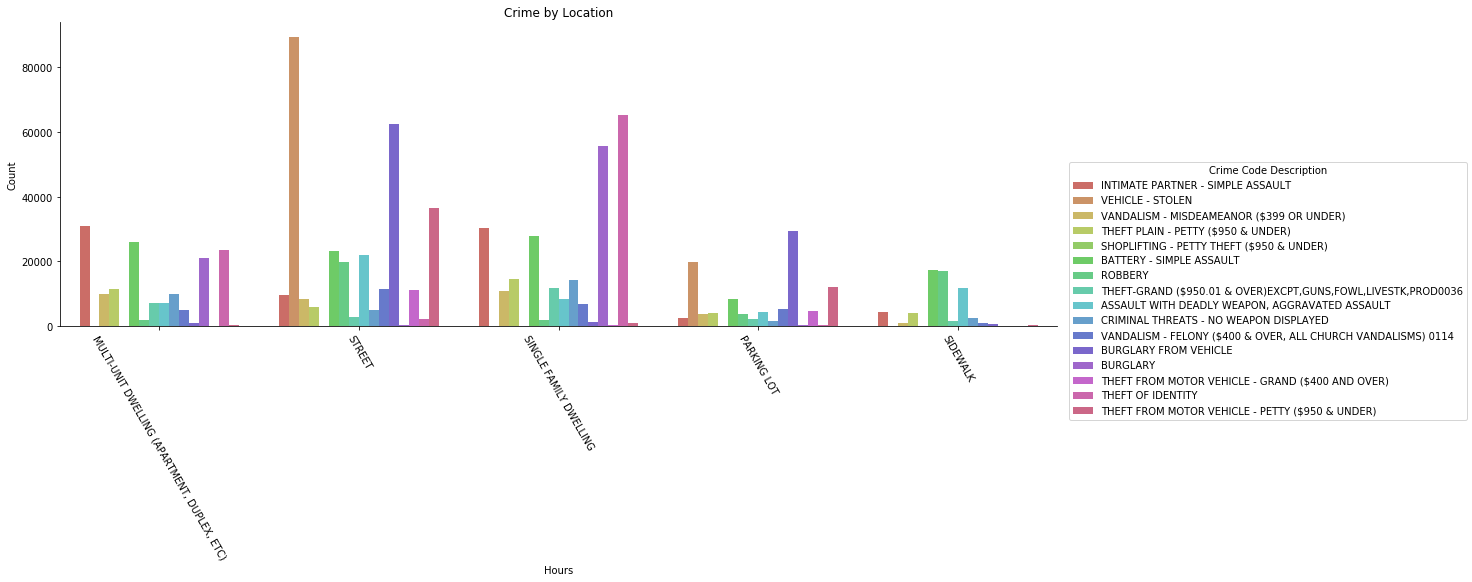

In [79]:
# Type of Crime by Location
sns.set_palette("hls", n_colors=16)
ax = sns.factorplot(x="Public Premise", hue="Crime Code Description", kind="count", data=crimepremtype, size=5, aspect=3)
# Axes
plt.title("Crime by Location")
ax.set_xticklabels(rotation=-60)
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

It is interesting to see that with the same amount of intimate partner sexual assault in mult-units and single family dwelling, the difference in identity theft and burglary is so significant.

Another thing is that vehicles are stolen four times more often in the street compared to the parking lot.

## 4.5. Juvenile Arrests

I plan to explore juvenile arrests to try and reduce it in the future.

There is no clear way to look at the infographics of the juvenile offender, so we shall look at who the victims are.

In [80]:
# Filtering the dataset with juvenile arrests (by selection)
crimejuv = crime.loc[crime["Status Description"].isin(["Juv Arrest"])]

In [81]:
crimejuv.shape

(12619, 39)

In [82]:
# Resetting color and size from above
sns.set()
rcParams['figure.figsize'] = (12,8)

### 4.5.1. Who

/Users/jjxu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


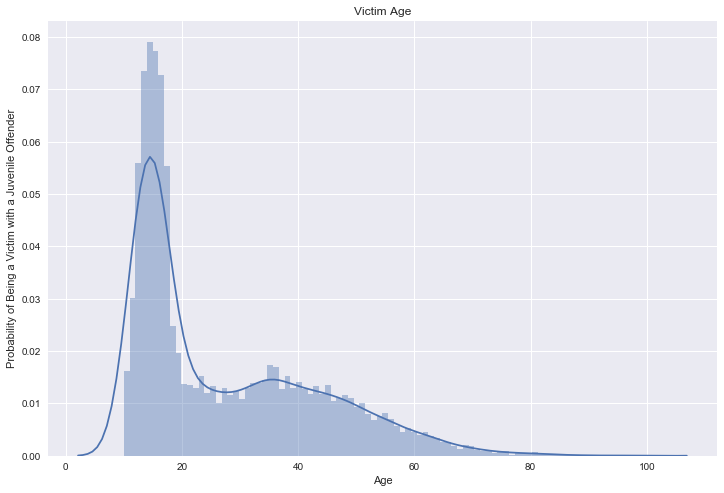

In [83]:
# Juvenile Victims Age Distribution
fig, ax = plt.subplots()
ax = sns.distplot(crimejuv["Victim Age"].dropna(), bins=90)
sns.set_style("whitegrid")
ax.set_title("Victim Age")
ax.set_ylabel("Probability of Being a Victim with a Juvenile Offender")
ax.set_xlabel("Age")
sns.despine()

The arrested offender is a juvenile. The Victim of the offender tends to be between 12 to 18 it seems.

### 4.5.2. What

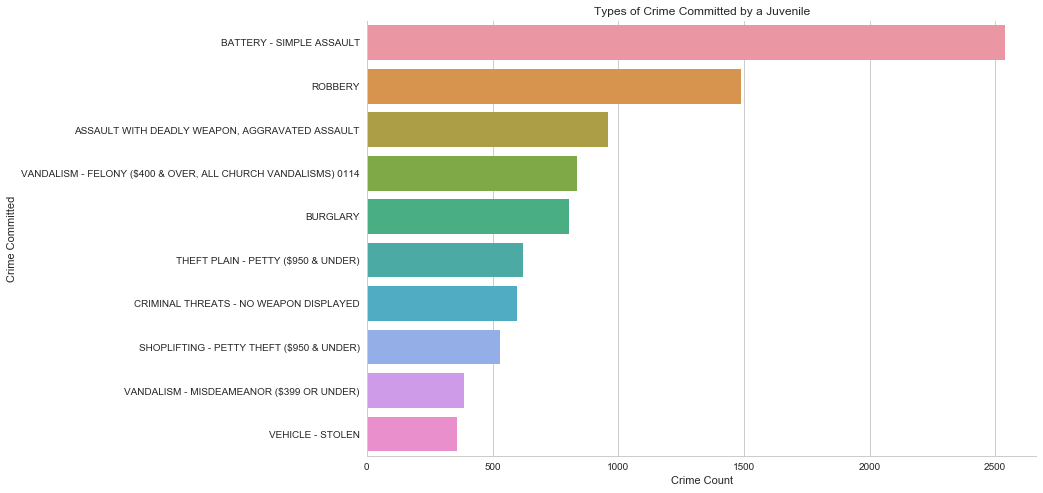

In [84]:
# Plotting top 10 types of crime committed by a juvenile.
fig, ax = plt.subplots()
# Axes
ax = sns.barplot(y=crimejuv["Crime Code Description"].value_counts().index[0:10], 
                 x=crimejuv["Crime Code Description"].value_counts().head(10))
ax.set_title("Types of Crime Committed by a Juvenile")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Committed")
sns.despine()

Going in, I expected shoplifting and vandalism to be the top contenders but I was not really surprised that battery simple assault takes the lead.

We have to reduce the violent characteristics of kids at a young age. There are several suspected sources such as media, videogames, and family that can affect violence.

### 4.5.3. Where

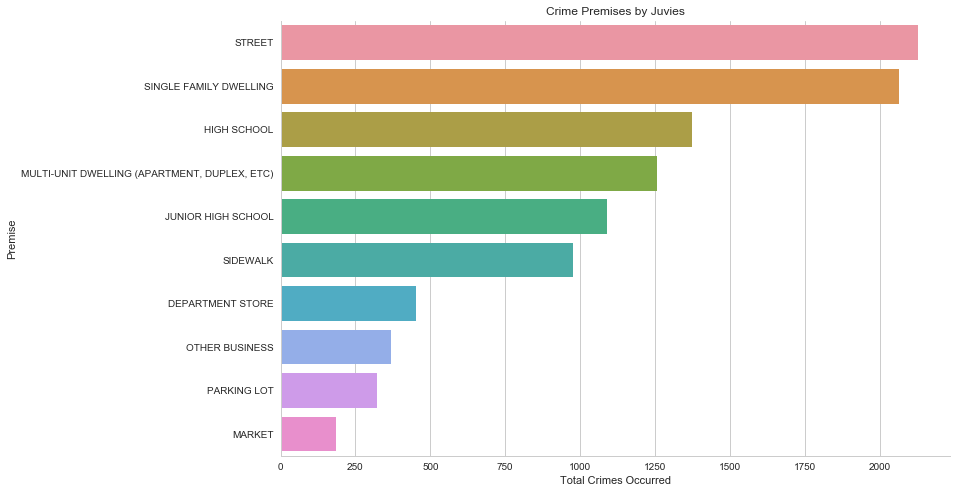

In [85]:
fig, ax = plt.subplots()
# Top 10 premises of crime by a juvie
ax = sns.barplot(y=crimejuv["Premise Description"].value_counts().head(10).index,
                 x=crimejuv["Premise Description"].value_counts().head(10))
# Axes
sns.set_style("whitegrid")
ax.set_title("Crime Premises by Juvies")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Premise")
sns.despine()

It is hard to tell if there are more kids living single family dwellings than multi-unit dwellings or kids in single family dwellings are more prone to committing a crime than the latter group.

It is just as surprising that there are equal amounts of crimes committed on the street as in a single family dwelling.

### 4.5.4. When

#### 4.5.4.1. By Day (Occured)

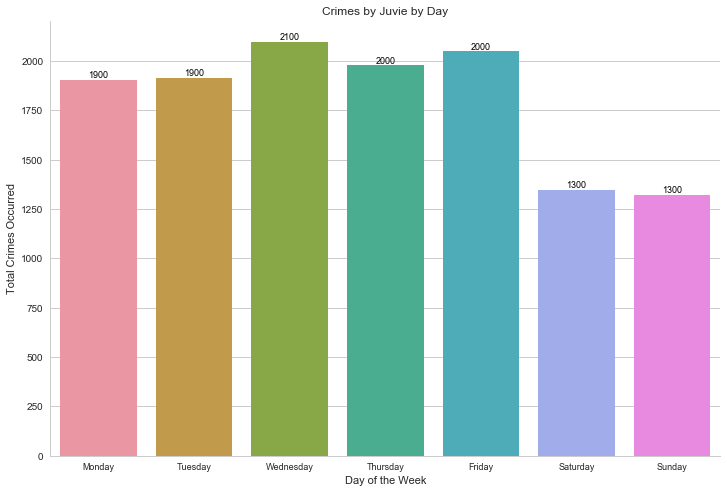

In [86]:
fig, ax = plt.subplots()
# Plotting crimes occurred by day
sns.barplot(x=crimejuv["Day Occurred"].value_counts().index, y=crimejuv["Day Occurred"].value_counts())
# Axes
ax.set_title("Crimes by Juvie by Day")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Occurred")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

It is trivial that crimes occur on weekdays since most juveniles are spending time with their family on the weekends.

#### 4.5.4.2. By Hour

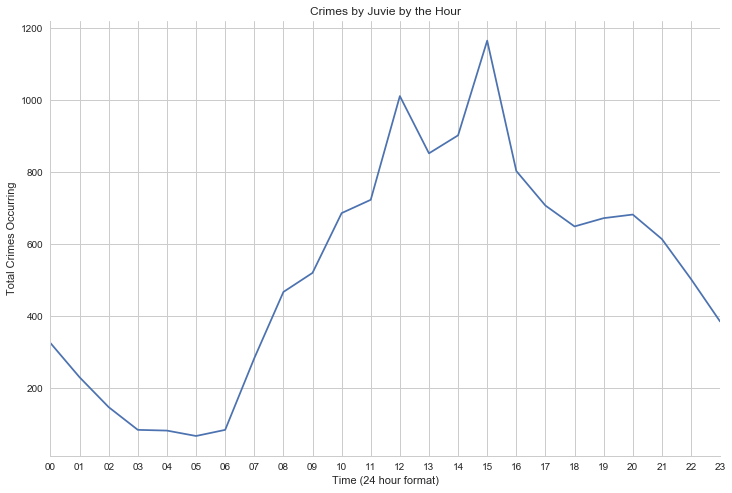

In [87]:
fig, ax = plt.subplots()
# Plotting crime through the hours
ax = plt.plot(crimejuv["Hour Occurred"].value_counts().sort_index().index, crimejuv["Hour Occurred"].value_counts().sort_index())
# Axes
plt.title("Crimes by Juvie by the Hour")
plt.xticks(range(24))
plt.xlim(0,23)
plt.xlabel("Time (24 hour format)")
plt.ylabel("Total Crimes Occurring")
sns.despine()

As we can, crimes occur throughout school lunch hours between 12pm to 4pm, with a spike at 3pm which is just after school ends.

## 4.6. Difference of most dangerous and safest neighborhood by hour

In [88]:
# Taking the max and min value of crimes occuring by Area (by equal to)
crime["Dang and Safe Area"] = crime["Area Name"][(crime["Area Name"] == "77th Street") |
                                           (crime["Area Name"] == "Hollenbeck")]

In [89]:
# Grouping by the counts
areahour = crime.groupby(["Dang and Safe Area", "Hour Occurred"]).size().reset_index(name="Count")
areahour.head(10)

,Dang and Safe Area,Hour Occurred,Count
0,77th Street,00,4143
1,77th Street,01,3134
2,77th Street,02,2774
3,77th Street,03,2215
4,77th Street,04,1728
5,77th Street,05,1577
6,77th Street,06,2091
7,77th Street,07,3145
8,77th Street,08,4555
9,77th Street,09,4249


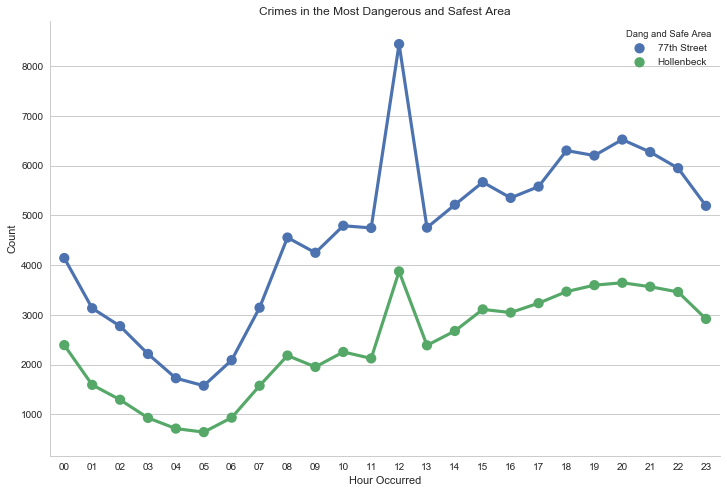

In [90]:
fig, ax = plt.subplots()
# Plotting crimes in the most dangerous and safest area by hour
sns.pointplot(x="Hour Occurred", y="Count", hue="Dang and Safe Area", data=areahour, ax=ax)
ax.set_title("Crimes in the Most Dangerous and Safest Area")
ax.set_ylabel("Count")
sns.despine()

Hollenbeck has 13150 population per square mile, and 77th Street has 14700 population per square mile.

Even though it is more population dense in 77th Street, it does not justify the nearly double crimes occurring in that area.

Of course, I could be missing the point if these crimes were committed by someone not residing in the neighborhood.

## 4.7. Looking Into What Happens at 12:00pm

So we shall delve deeper into what drives these 12pm crime surges on the graph.

### 4.7.1. Premise and Crime Type

In [91]:
# Filtering data for only 12pm (by selection)
crimenoon = crime.loc[crime["Hour Occurred"].isin(["12"])]

# Taking only top 6 crimes
top6crimes = crimenoon["Crime Code Description"].value_counts().head(6).index
crimenoon = crimenoon.loc[crimenoon["Crime Code Description"].isin(top6crimes)]

# Taking only top 6 premises
top6premises = crimenoon["Premise Description"].value_counts().head(6).index
crimenoon = crimenoon.loc[crimenoon["Premise Description"].isin(top6premises)]

In [92]:
print("The shape is {}".format(crimenoon.shape))

The shape is (56183, 40)


In [93]:
ccpremnoon = crimenoon.groupby(["Crime Code Description", "Premise Description"]).size().reset_index(name="Count")

In [94]:
ccpremnoon.head()

,Crime Code Description,Premise Description,Count
0,BATTERY - SIMPLE ASSAULT,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",1231
1,BATTERY - SIMPLE ASSAULT,OTHER BUSINESS,444
2,BATTERY - SIMPLE ASSAULT,PARKING LOT,452
3,BATTERY - SIMPLE ASSAULT,SIDEWALK,821
4,BATTERY - SIMPLE ASSAULT,SINGLE FAMILY DWELLING,1455


In [95]:
ccpremise = ccpremnoon.pivot("Crime Code Description", "Premise Description", "Count")

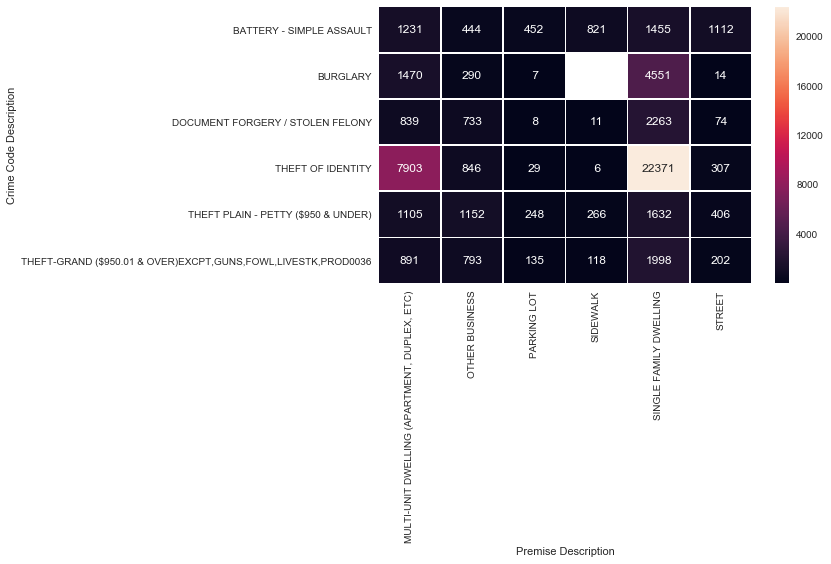

In [96]:
# Prepping data for heatmap
ccpremise = ccpremnoon.pivot("Crime Code Description", "Premise Description", "Count")

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(ccpremise, annot=True, linewidths=.5, ax=ax, fmt="2g")
fig.tight_layout()

As we can see, a total of approximately 30,000 identity theft occurs at around 12pm. An explanation for this could be that 
in a daily hacker's day, they would wake up and start to steal identities around noon.

Another explanation could be since one does not know when identity theft occurs, they just rounded and assumed it was exactly 
12pm.

I personally find the second explanation to be more plausible since it is hard to pinpoint when exactly identity theft occurs.

### 4.7.2. Removing THEFT OF IDENTITY

In [97]:
# Get list of top 6 crimes
noidentheft = list(crimenoon["Crime Code Description"].value_counts().head(6).index)

# Remove identitfy theft since it doesn't really matter with time
try:
    noidentheft.pop(noidentheft.index("THEFT OF IDENTITY"))
except:
    print("Can't find THEFT OF IDENTITY")

In [98]:
# Make new dataset without identity theft
crimenoon2 = crimenoon.loc[crimenoon["Crime Code Description"].isin(noidentheft)]

In [99]:
# Groupby crime code and premise
ccpremnoon2 = crimenoon2.groupby(["Crime Code Description", "Premise Description"]).size().reset_index(name="Count")

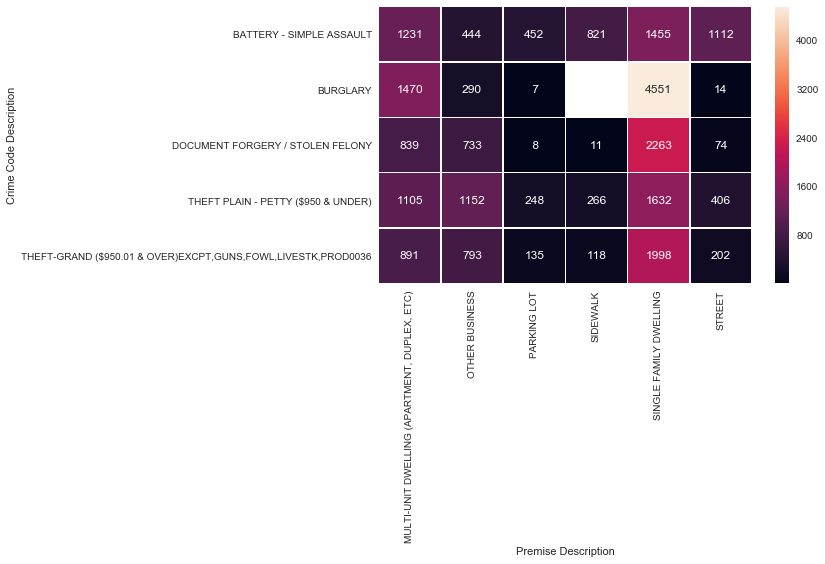

In [100]:
# Prepping data for heatmap
ccpremise2 = ccpremnoon2.pivot("Crime Code Description", "Premise Description", "Count")

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(ccpremise2, annot=True, linewidths=.5, ax=ax, fmt="2g")
fig.tight_layout()

Excluding identity theft, our second cause of noon crimes occur in single family dwelling. I shall go over through the top 5:
* Burglary in single family dwelling. This makes sense because owners aren't home which makes an easy target for burglars.
* Document forgery in single family dwelling. As with identity theft, it is hard to pinpoint when exactly a document is forged, thus attributed to 12pm.
* Grand theft and Petty theft in single family dwellings follows the same logic that there will be no owners at home.
* Burglary in multi-unit dwellings also makes sense because most of the inhabitants are out at work for the day.

## 4.8. Identity Theft Victims

In [101]:
# Filter data with only Identity Theft crimes
identheftvic = crime[crime["Crime Code Description"] == "THEFT OF IDENTITY"]

In [102]:
# Create subset with victim gender and age, then drop Na Values
identheftvic = identheftvic[["Victim Gender", "Victim Age"]]
identheftvic = identheftvic.dropna()

Text(0.5,1,'Victims of Identity Theft')

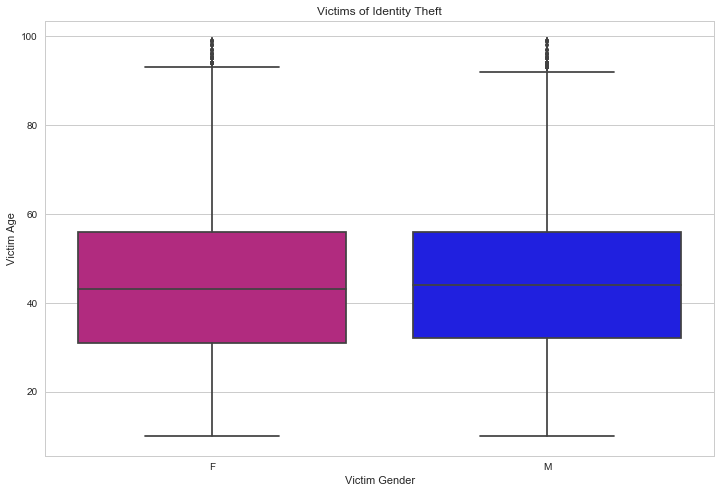

In [103]:
# Plot victims by gender and age
sns.boxplot(y="Victim Age", x="Victim Gender", data=identheftvic, palette={"M": "b", "F": "mediumvioletred"})
# Axes
plt.title("Victims of Identity Theft")

It is amazing how perfectly equal the distribution for victims of identity theft are, regarding their gender and age.

## 4.9. Crimes by Month, Excluding 2017

In [104]:
# Filtering 2017 out of the dataframe
crimeno17 = crime.loc[crime["Year Occurred"].isin(range(2010, 2017))]

In [105]:
# Making a new dataframe
df4 = pd.DataFrame({
    'Month': list(crimeno17["Month Reported"].value_counts().index),
    'Crime Reported': list(crimeno17["Month Reported"].value_counts()),
    'Crime Occurred': list(crimeno17["Month Occurred"].value_counts())
})
monrepoccclean = df4.set_index("Month").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

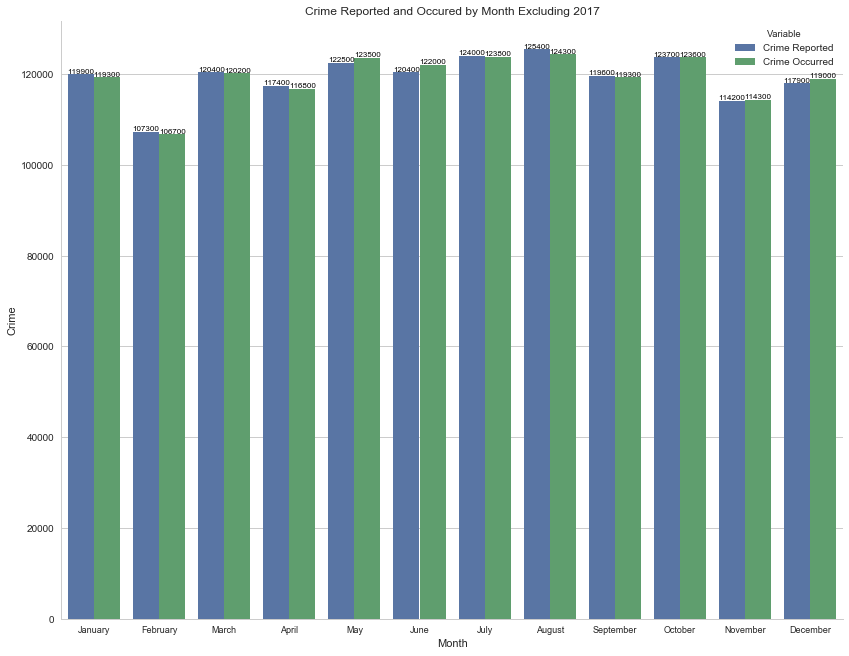

In [106]:
fig, ax = plt.subplots(figsize=(14,11))
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Month", y = "Crime", hue = "Variable", data=monrepoccclean, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Month Excluding 2017")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=8, color='black', ha='center', va='bottom')
sns.despine(fig)

Excluding the missing data from Sept 2017 to Dec 2017, the monthly distribution of Crimes reported and occurring are equal, with months having 31 days generally having more than the ones with 30 days and 28 days.

# 5. THE END

Thanks [kennethnyu](https://github.com/kennethnyu/lacrime) for sharing his code.